<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [74]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [75]:
seaborn.__version__

'0.9.0'

In [76]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [77]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [78]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [79]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

## Punto 1

# 1.

Para las variables s\'olo necesitamos columnas que contengas pf_identify, ef_score, ef_rank, hf_score, hf_rank.

In [80]:
#Variables a procesar

variables = []

variables += [col for col in dataset.columns if 'pf_identity' in col]

variables += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [81]:
dataset[variables]

,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


In [82]:
rangos_variables = [max(dataset[var]) - min(dataset[var]) for var in dataset[variables]]
rangos_variables

[10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 6.31,
 161.0,
 5.360486062,
 161.0]

In [83]:
rangos_variables = [(var, max(dataset[var]), min(dataset[var])) for var in dataset[variables]]
rangos_variables

[('pf_identity_legal', 10.0, 0.0),
 ('pf_identity_parental_marriage', 10.0, 0.0),
 ('pf_identity_parental_divorce', 10.0, 0.0),
 ('pf_identity_parental', 10.0, 0.0),
 ('pf_identity_sex_male', 10.0, 0.0),
 ('pf_identity_sex_female', 10.0, 0.0),
 ('pf_identity_sex', 10.0, 0.0),
 ('pf_identity_divorce', 10.0, 0.0),
 ('pf_identity', 10.0, 0.0),
 ('ef_score', 9.19, 2.88),
 ('ef_rank', 162.0, 1.0),
 ('hf_score', 9.126312939, 3.765826877),
 ('hf_rank', 162.0, 1.0)]

# 2.

Separamos los valores en anios para poder comparar anio a anio

In [84]:
anios = numpy.arange(2008, 2017, 1)
datos_por_anio = []

for anio in anios:
    datos_por_anio.append(dataset[dataset['year'] == anio])
    

#variables = ['pf_identity'] + ['hf_score'] 
    
#for datos_anuales in datos_por_anio:
    #print("anio ",  datos_anuales['year'].iloc[0],"\n", datos_anuales[variables].describe(), "\n")


#numpy.unique(dataset['year'])       

In [85]:
datos_latinoamerica = dataset[dataset['region'] == 'Latin America & the Caribbean']
datos_resto_mundo = dataset[dataset['region'] != 'Latin America & the Caribbean']

datos_por_anio = []
datos_por_anioLAyC = []
datos_por_anioRM = []

for anio in anios:
    datos_por_anio.append(dataset[dataset['year'] == anio])
    datos_por_anioLAyC.append(datos_latinoamerica[datos_latinoamerica['year'] == anio])
    datos_por_anioRM.append(datos_resto_mundo[datos_resto_mundo['year'] == anio])
    
variables = ['pf_identity'] + ['ef_score'] + ['hf_score']

for datos_anualesLAyC, datos_anualesRM in zip(datos_por_anioLAyC, datos_por_anioRM):
    print("anio ",  datos_anualesLAyC['year'].iloc[0],"\n", datos_anualesLAyC['region'].iloc[0],"\n", datos_anualesLAyC[variables].describe(), "\n")
    print("\nanio ",  datos_anualesRM['year'].iloc[0],"\n", datos_anualesRM['region'].iloc[0],"\n", datos_anualesRM[variables].describe(), "\n")


anio  2008 
 Latin America & the Caribbean 
        pf_identity   ef_score   hf_score
count    25.000000  25.000000  25.000000
mean      8.900000   6.768000   7.118196
std       1.779513   0.759413   0.577066
min       5.000000   4.220000   5.257879
25%       7.500000   6.400000   6.805600
50%      10.000000   6.760000   7.035120
75%      10.000000   7.280000   7.399236
max      10.000000   7.800000   8.227215 


anio  2008 
 Eastern Europe 
        pf_identity    ef_score    hf_score
count   116.000000  116.000000  116.000000
mean      7.219828    6.736724    7.059351
std       3.293134    0.970847    1.088677
min       0.000000    3.860000    4.823528
25%       5.000000    6.067500    6.226072
50%       8.750000    6.830000    6.952007
75%      10.000000    7.425000    8.110934
max      10.000000    9.190000    9.126313 

anio  2009 
 Latin America & the Caribbean 
        pf_identity   ef_score   hf_score
count    25.000000  25.000000  25.000000
mean      8.900000   6.773600   7.113

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

6.976337448555557


Text(0, 0.5, 'Personal Freedom - Identity')

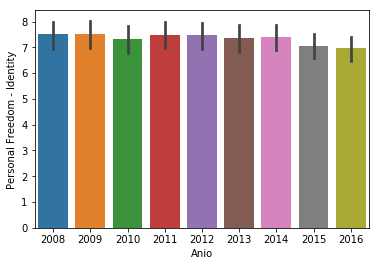

In [86]:
print(dataset[dataset['year'] == 2016]['pf_identity'].mean())

seaborn.barplot(data = dataset, x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

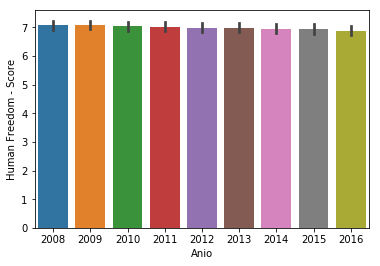

In [87]:
seaborn.barplot(data = dataset, x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

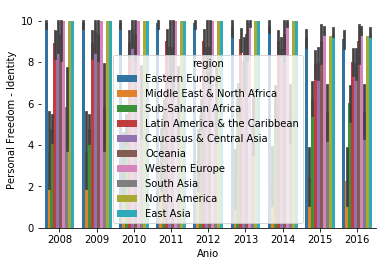

In [88]:
seaborn.barplot(data = dataset, x='year', y='pf_identity', hue = 'region')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

seaborn.despine(left=True)

Text(0, 0.5, 'Personal Freedom - Identity')

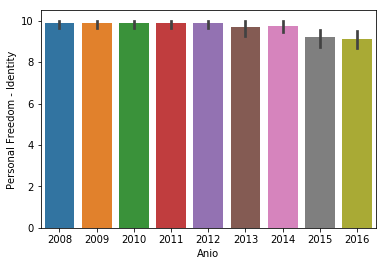

In [89]:
seaborn.barplot(data = dataset[dataset['region'] == 'Eastern Europe'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

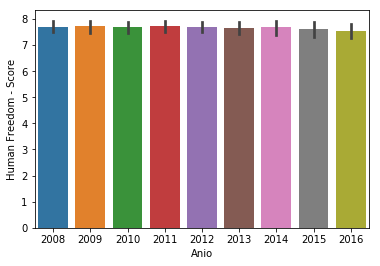

In [90]:
seaborn.barplot(data = dataset[dataset['region'] == 'Eastern Europe'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

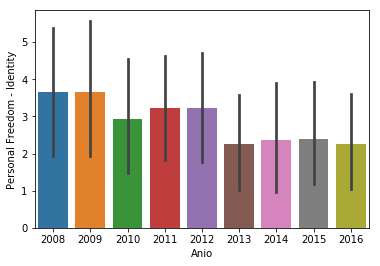

In [91]:
seaborn.barplot(data = dataset[dataset['region'] == 'Middle East & North Africa'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

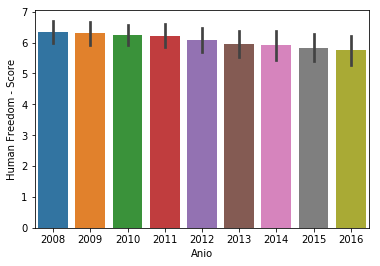

In [92]:
seaborn.barplot(data = dataset[dataset['region'] == 'Middle East & North Africa'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

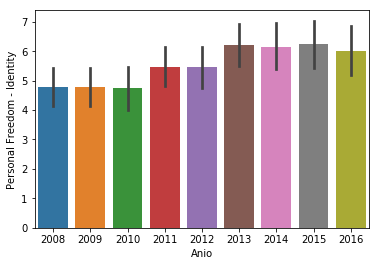

In [93]:
seaborn.barplot(data = dataset[dataset['region'] == 'Sub-Saharan Africa'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

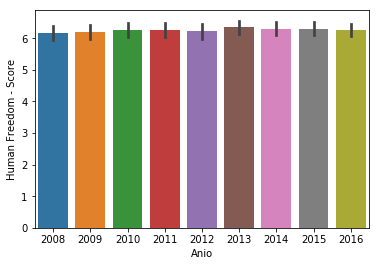

In [94]:
seaborn.barplot(data = dataset[dataset['region'] == 'Sub-Saharan Africa'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

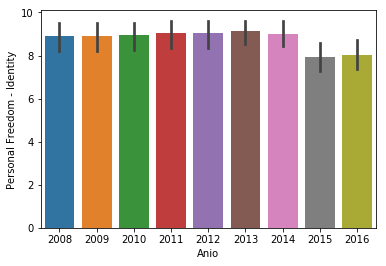

In [95]:
seaborn.barplot(data = dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

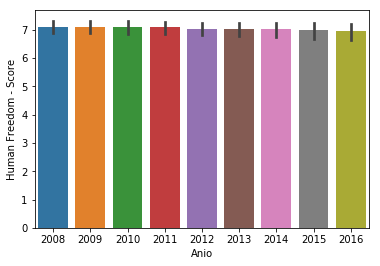

In [96]:
seaborn.barplot(data = dataset[dataset['region'] == 'Latin America & the Caribbean'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

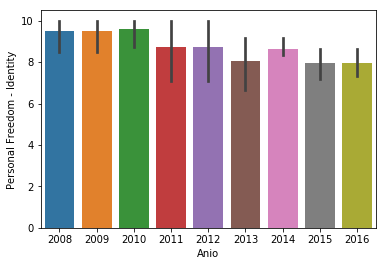

In [97]:
seaborn.barplot(data = dataset[dataset['region'] == 'Caucasus & Central Asia'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

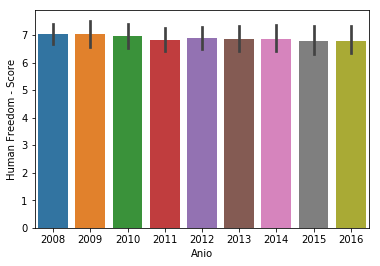

In [98]:
seaborn.barplot(data = dataset[dataset['region'] == 'Caucasus & Central Asia'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

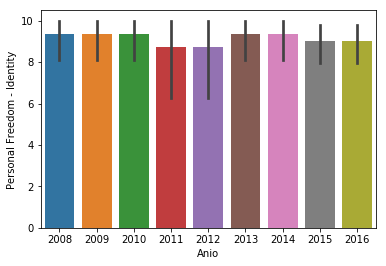

In [99]:
seaborn.barplot(data = dataset[dataset['region'] == 'Oceania'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

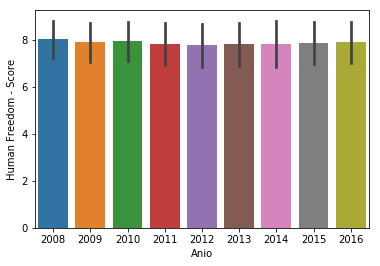

In [100]:
seaborn.barplot(data = dataset[dataset['region'] == 'Oceania'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

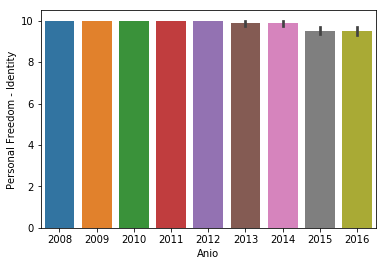

In [101]:
seaborn.barplot(data = dataset[dataset['region'] == 'Western Europe'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

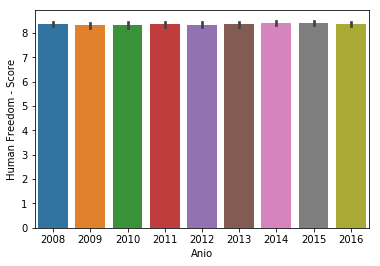

In [102]:
seaborn.barplot(data = dataset[dataset['region'] == 'Western Europe'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

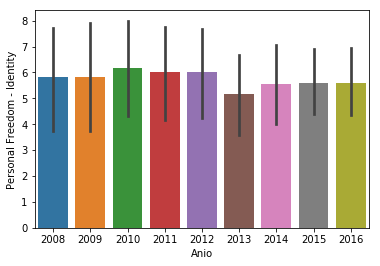

In [103]:
seaborn.barplot(data = dataset[dataset['region'] == 'South Asia'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

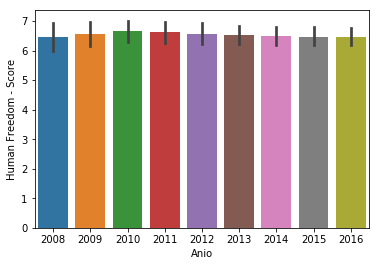

In [104]:
seaborn.barplot(data = dataset[dataset['region'] == 'South Asia'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

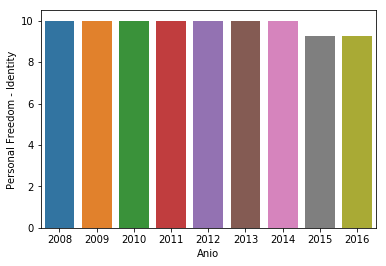

In [105]:
seaborn.barplot(data = dataset[dataset['region'] == 'North America'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

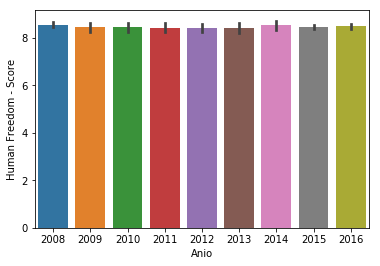

In [106]:
seaborn.barplot(data = dataset[dataset['region'] == 'North America'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

Text(0, 0.5, 'Personal Freedom - Identity')

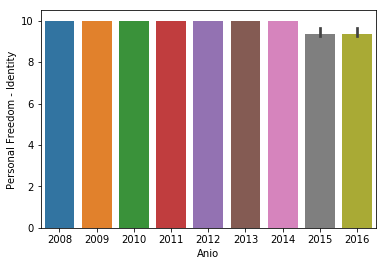

In [107]:
seaborn.barplot(data = dataset[dataset['region'] == 'East Asia'], x='year', y='pf_identity')
plt.xlabel('Anio')
plt.ylabel('Personal Freedom - Identity')

Text(0, 0.5, 'Human Freedom - Score')

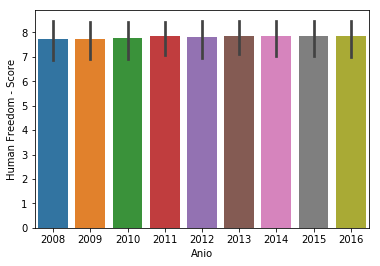

In [108]:
seaborn.barplot(data = dataset[dataset['region'] == 'East Asia'], x='year', y='hf_score')
plt.xlabel('Anio')
plt.ylabel('Human Freedom - Score')

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

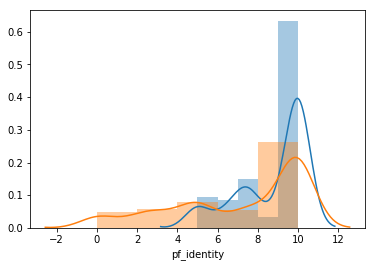

In [109]:
seaborn.distplot((dataset[dataset['region'] == 'Latin America & the Caribbean'])['pf_identity'].dropna(), bins = 5)
seaborn.distplot((dataset[dataset['region'] != 'Latin America & the Caribbean'])['pf_identity'].dropna(), bins = 5)

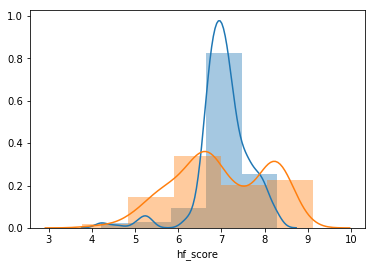

In [110]:
seaborn.distplot((dataset[dataset['region'] == 'Latin America & the Caribbean'])['hf_score'].dropna(), bins = 5)
seaborn.distplot((dataset[dataset['region'] != 'Latin America & the Caribbean'])['hf_score'].dropna(), bins = 5)

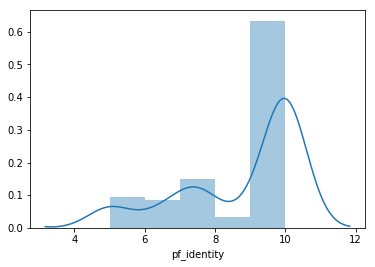

In [111]:

seaborn.distplot((dataset[dataset['region'] == 'Latin America & the Caribbean'])['pf_identity'].dropna(), bins = 5)

# KSTEST!!!!! !!! !!

KstestResult(statistic=0.35088781204626546, pvalue=0.0)


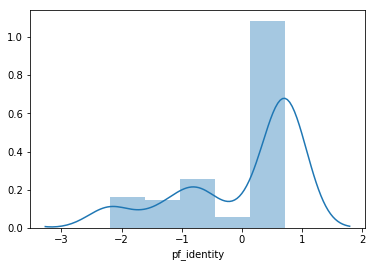

In [112]:
media = dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna().mean()
des = dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna().std()

seaborn.distplot(((dataset[dataset['region'] == 'Latin America & the Caribbean'])['pf_identity'].dropna() - media)/des, bins = 5)
print(stats.kstest(((dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()) - media)/des, 'norm'))

KstestResult(statistic=0.1504746027707088, pvalue=4.737935317389308e-05)


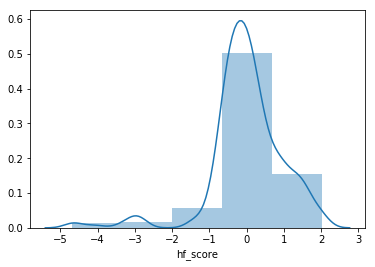

In [113]:
media = dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna().mean()
des = dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna().std()

seaborn.distplot(((dataset[dataset['region'] == 'Latin America & the Caribbean'])['hf_score'].dropna() - media)/des, bins = 5)
print(stats.kstest(((dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()) - media)/des, 'norm'))

KstestResult(statistic=0.1224228025540085, pvalue=0.0017301088910812723)


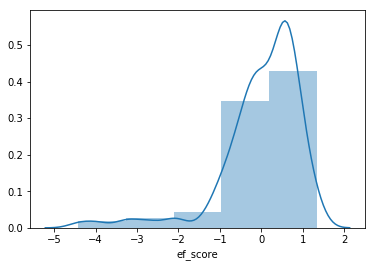

In [114]:
media = dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna().mean()
des = dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna().std()

seaborn.distplot(((dataset[dataset['region'] == 'Latin America & the Caribbean'])['ef_score'].dropna() - media)/des, bins = 5)
print(stats.kstest(((dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna()) - media)/des, 'norm'))

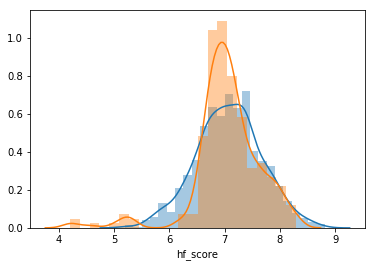

In [115]:
loc, scale = stats.norm.fit(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), label='Human Freedom - Score\n LatinoAmerica')


In [116]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna())), percentiles)

In [117]:
print(stats.kstest(qn_distribucion_normal, 'norm'))

KstestResult(statistic=0.9999998433487804, pvalue=0.0)


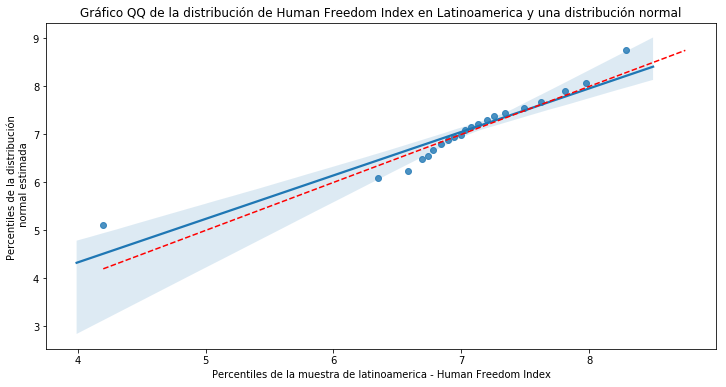

In [118]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel('Percentiles de la muestra de latinoamerica - Human Freedom Index')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de Human Freedom Index en Latinoamerica y una distribución normal')

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")


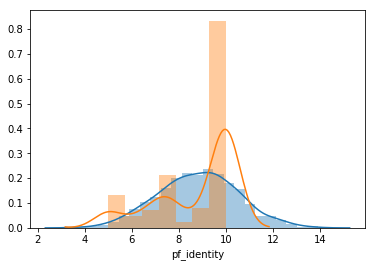

In [119]:
loc, scale = stats.norm.fit(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), label='Human Freedom - Score\n LatinoAmerica')


# Ver!! Son Pocos Datos???

En este caso se filtro por a;o 2015

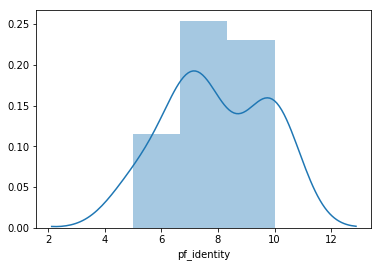

In [120]:
cols = ['pf_identity'] + ['year']
prueba = dataset[dataset['region'] == 'Latin America & the Caribbean'][cols].dropna()
prueba = prueba[prueba['year'] == 2015]['pf_identity']
#prueba = prueba[prueba['year'] == 2015]

seaborn.distplot(prueba, label='prueba')

In [121]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna())), percentiles)

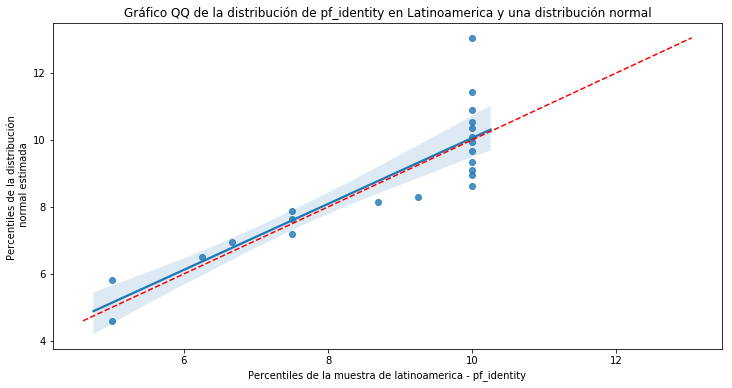

In [122]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel('Percentiles de la muestra de latinoamerica - pf_identity')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity en Latinoamerica y una distribución normal')

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

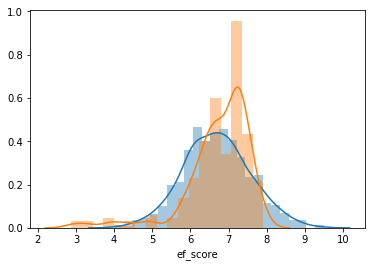

In [123]:
loc, scale = stats.norm.fit(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna())

distribucion_normal = stats.norm(loc, scale)
muestra = distribucion_normal.rvs(1000)

seaborn.distplot(muestra, label='Distribucion Normal')
seaborn.distplot(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna(), label='Human Freedom - Score\n LatinoAmerica')


In [124]:
percentiles = numpy.linspace(0, 100, 21)
qn_muestras = numpy.percentile(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna(), percentiles)
qn_distribucion_normal = numpy.percentile(distribucion_normal.rvs(len(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna())), percentiles)

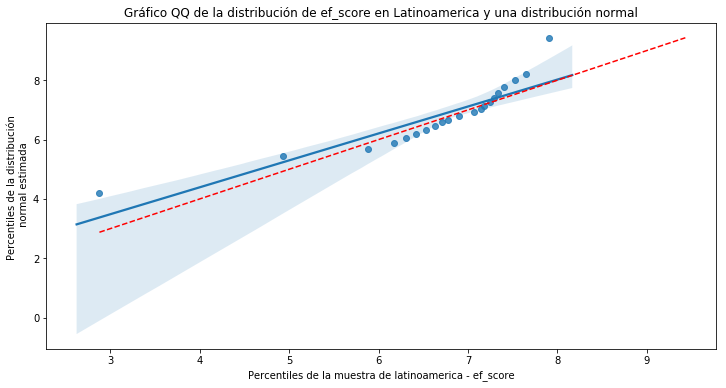

In [125]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_muestras, y=qn_distribucion_normal)
plt.xlabel('Percentiles de la muestra de latinoamerica - ef_score')
plt.ylabel('Percentiles de la distribución \n normal estimada')
plt.title('Gráfico QQ de la distribución de ef_score en Latinoamerica y una distribución normal')

x = numpy.linspace(numpy.min((qn_muestras.min(), qn_distribucion_normal.min())), numpy.max((qn_muestras.max(),qn_distribucion_normal.max())))
plt.plot(x,x, color='RED', ls="--")

In [126]:
def asimetria_fisher(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**3
    suma = numpy.sum(valor_menos_media)
        
    return suma/(len(muestra) * (desvio**3))

print(asimetria_fisher(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()))
print(asimetria_fisher(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna()))
print(asimetria_fisher(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()))

-1.4327783341690914
-1.9866044103738005
-1.0410764737762728


In [127]:
def curtosis(muestra):
    
    media = muestra.mean()
    desvio = muestra.std()
    
    valor_menos_media = (muestra - media)**4
    suma = numpy.sum(valor_menos_media)
        
    return (suma/(len(muestra) * (desvio**4)))-3

print(curtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']['hf_score'].dropna()))
print(curtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']['ef_score'].dropna()))
print(curtosis(dataset[dataset['region'] == 'Latin America & the Caribbean']['pf_identity'].dropna()))

5.26844573498823
5.116427226258979
-0.31857094209372283


## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


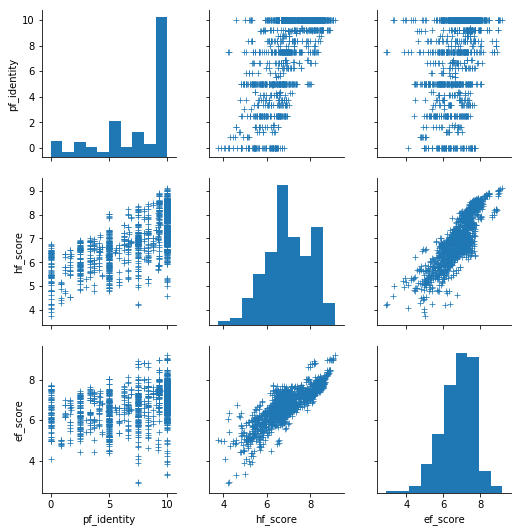

In [128]:
seaborn.pairplot(data=dataset, vars=['pf_identity', 'hf_score', 'ef_score'], markers='+')

# Calculos de Covariancia y Coeficientes de Correlacion (Kendal, Spearman, Pearson)

In [129]:
datos1 = dataset['ef_score'].dropna()
datos2 = dataset['hf_score'].dropna()
datos3 = dataset['pf_identity'].dropna()

print(numpy.cov(datos1, datos2)[0][1])
print(numpy.cov(datos1, datos3)[0][1])
print(numpy.cov(datos2, datos3)[0][1])

print('numero datos1 = ', len(datos1), 'numero datos2 = ', len(datos2), 'numero datos3 = ', len(datos3))

0.7748561895051655
1.0856334099430547
2.1966164733462246
numero datos1 =  1378 numero datos2 =  1378 numero datos3 =  1378


In [130]:
counter = 0.
sum1 = 0.
sum2 = 0.
sum3 = 0.

datos1 = dataset['ef_score']
datos2 = dataset['hf_score']
datos3 = dataset['pf_identity']

m1 = numpy.mean(datos1)
m2 = numpy.mean(datos2)
m3 = numpy.mean(datos3)

desv1 = numpy.std(datos1.dropna())
desv2 = numpy.std(datos2.dropna())
desv3 = numpy.std(datos3.dropna())

for d1, d2, d3 in zip(datos1, datos2, datos3):
    
    if((not numpy.isnan(d1)) and (not numpy.isnan(d2)) and (not numpy.isnan(d3))):
        sum1 = sum1 + ((d1 - m1) * (d2 - m2))
        sum2 = sum2 + ((d1 - m1) * (d3 - m3))
        sum3 = sum3 + ((d2 - m2) * (d3 - m3))
        #print(sum1, ' ', sum2, ' ', sum3)
        counter = counter + 1
        
print()
print(sum1/counter)
print(sum2/counter)
print(sum3/counter)

covEfHf = sum1/counter
covEfPf = sum2/counter
covHfPf = sum3/counter



0.774293884578093
1.084845577279817
2.1950224120448114


Pearson - Se exige que provengan de una distro normal las muestras

In [131]:
pearsonEfHf = covEfHf/(desv1 * desv2)
print(pearsonEfHf)

pearsonEfPf = covEfPf/(desv1 * desv3)
print(pearsonEfPf)

pearsonHfPf = covHfPf/(desv2 * desv3)
print(pearsonHfPf)

0.8548651479506566
0.38887723797145946
0.6777541950437723


In [132]:
print("PEARSON")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='pearson'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='pearson'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='pearson'))


PEARSON

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.854865
hf_score  0.854865  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.388877
pf_identity  0.388877     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.677754
pf_identity  0.677754     1.000000


In [133]:
print("SPEARMAN")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='spearman'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='spearman'))


SPEARMAN

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.860647
hf_score  0.860647  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score     1.000000     0.426993
pf_identity  0.426993     1.000000

Hf - Pf
             hf_score  pf_identity
hf_score     1.000000     0.686109
pf_identity  0.686109     1.000000


In [134]:
print("KENDALL")
print('\nEf - Hf')
cols = ['ef_score'] + ['hf_score']
print(dataset[cols].corr(method='kendall'))

print('\nEf - Pf')
cols = ['ef_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

print('\nHf - Pf')
cols = ['hf_score'] + ['pf_identity']
print(dataset[cols].corr(method='kendall'))

KENDALL

Ef - Hf
          ef_score  hf_score
ef_score  1.000000  0.681062
hf_score  0.681062  1.000000

Ef - Pf
             ef_score  pf_identity
ef_score      1.00000      0.30812
pf_identity   0.30812      1.00000

Hf - Pf
             hf_score  pf_identity
hf_score      1.00000      0.52131
pf_identity   0.52131      1.00000
